In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\ricky\AppData\Local\Temp\ipykernel_11428\2622020097.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


- напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [2]:
def h(w, X):
    return np.dot(X, w)

- Cтворіть функцію для обчислення функції втрат у векторному вигляді

In [3]:
def mse(w, X, y):
    m = len(y)
    predictions = h(w, X)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

- Реалізуйте один крок градієнтного спуску

In [4]:
def grad_descent_step(w, X, y, learning_rate=0.00001):
    m = len(y)
    predictions = h(w, X)
    errors = predictions - y
    gradient = (1 / m) * X.T.dot(errors)
    w -= learning_rate * gradient
    return w

In [5]:
"Функція для багатокрокового градієнтного спуску в лінійній регресії."
def gradient_descent(X, y, w, learning_rate, num_iterations):
    for _ in range(num_iterations):
        w = grad_descent_step(w, X, y, learning_rate)
    return w

- Знайдіть найкращі параметри для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [6]:
df = pd.read_csv('Housing.csv')
df.replace('NaN', np.nan, inplace=True)
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']
model = LinearRegression().fit(X, y)
print(f'Scikit-learn coeficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

Scikit-learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.6076326333


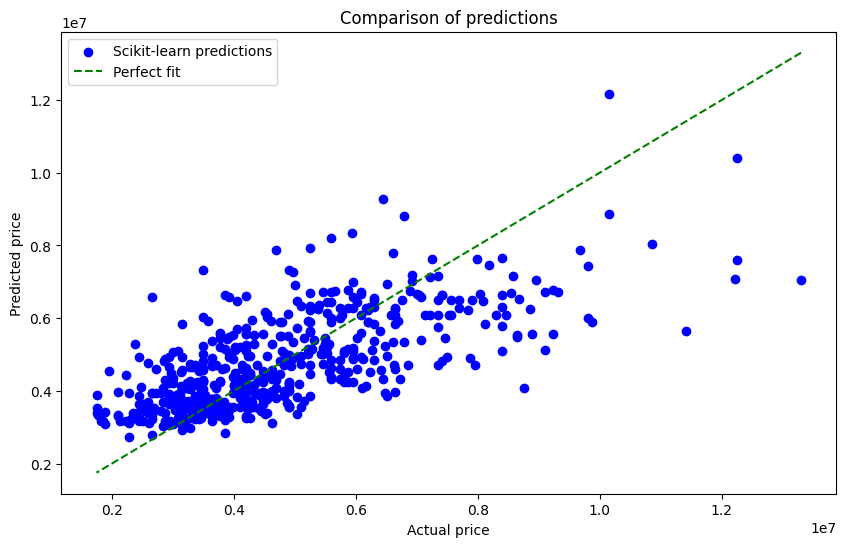

In [8]:
import matplotlib.pyplot as plt

features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

scikit_predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, scikit_predictions, color='blue', label='Scikit-learn predictions')
plt.plot(y, y, color='green', linestyle='--', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

- Знайдіть ці ж параметри за допомогою аналітичного рішення

In [9]:
X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(f'Analitic learn coeficients: {w[1:]}')
print(f'Analitic learn intercept: {w[0]}')

Analitic learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Analitic learn intercept: -173171.6076326356


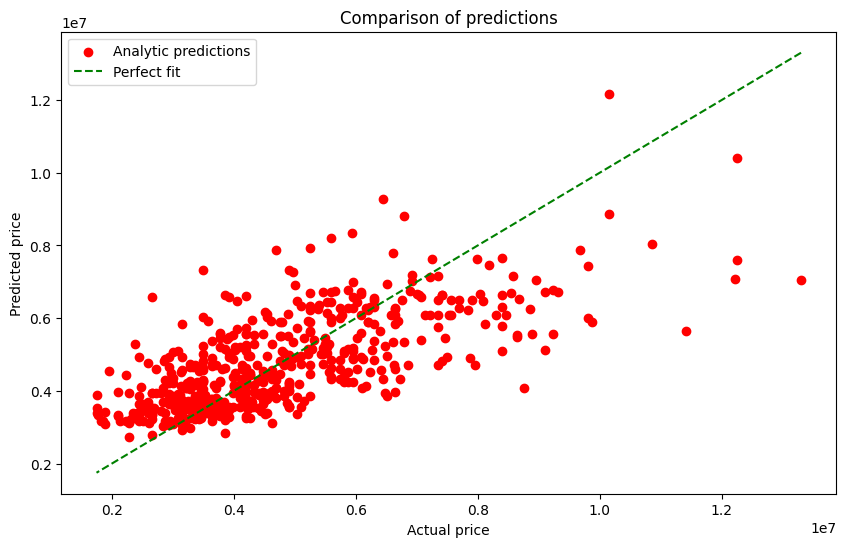

In [10]:
features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']


X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
analytic_predictions = np.dot(X, w)

plt.figure(figsize=(10, 6))
plt.scatter(y, analytic_predictions, color='red', label='Analytic predictions')
plt.plot(y, y, color='green', linestyle='--', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()


- порівняйте отримані результати

Scikit-learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.6076326333
Analitic learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Analitic learn intercept: -173171.6076326356


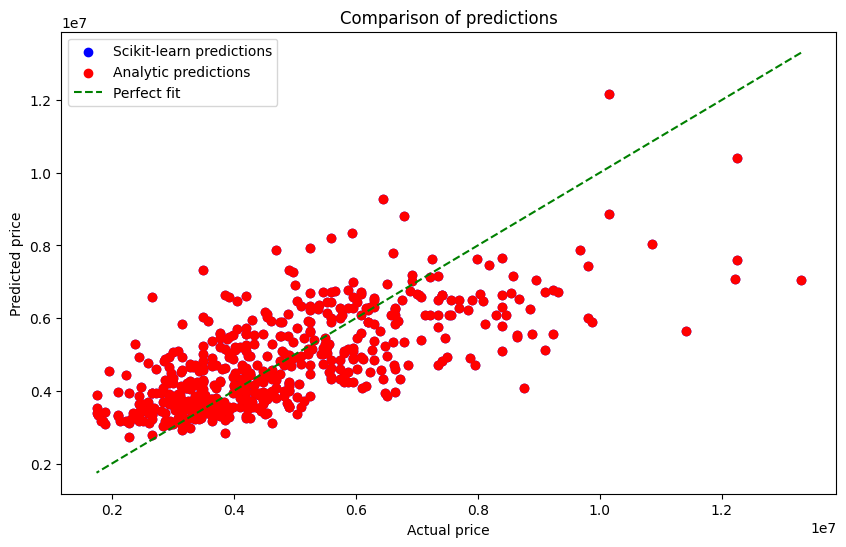

In [11]:
print(f'Scikit-learn coeficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

print(f'Analitic learn coeficients: {w[1:]}')
print(f'Analitic learn intercept: {w[0]}')


import matplotlib.pyplot as plt

features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

scikit_predictions = model.predict(X)

X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
analytic_predictions = np.dot(X, w)

plt.figure(figsize=(10, 6))
plt.scatter(y, scikit_predictions, color='blue', label='Scikit-learn predictions')
plt.scatter(y, analytic_predictions, color='red', label='Analytic predictions')
plt.plot(y, y, color='green', linestyle='--', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()
